In [67]:
#1
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Inc_Exp_Data.csv")

print(df)

    Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   

In [70]:
#a
income_mean = df['Mthly_HH_Income'].mean()
income_median = df['Mthly_HH_Income'].median()
income_mode = df['Mthly_HH_Income'].mode()[0]
income_variance = df['Mthly_HH_Income'].var()
income_std_dev = df['Mthly_HH_Income'].std()
print("Mean:", income_mean, "Median:", income_median, "Mode:", income_mode,
      "Variance:", income_variance, "Standard Deviation:", income_std_dev)


Mean: 41558.0 Median: 35000.0 Mode: 45000 Variance: 681100853.0612245 Standard Deviation: 26097.908978713687


In [71]:
# b
pg_income = df[df['Highest_Qualified_Member'] == 'Post-Graduate']['Mthly_HH_Income'].dropna()
illit_income = df[df['Highest_Qualified_Member'] == 'Illiterate']['Mthly_HH_Income'].dropna()

mean_pg = pg_income.mean()
mean_illit = illit_income.mean()
var_pg = pg_income.var()
var_illit = illit_income.var()

#t-test
n1, n2 = len(pg_income), len(illit_income)
std__ = np.sqrt(((n1 - 1) * var_pg + (n2 - 1) * var_illit) / (n1 + n2 - 2))
t_stat = (mean_pg - mean_illit) / (std__ * np.sqrt(1/n1 + 1/n2))

print("T-test statistic:", t_stat)


T-test statistic: 1.9829663816524452


In [72]:
mean_income = df['Mthly_HH_Income'].mean()
std_dev_income = df['Mthly_HH_Income'].std()
sample_size = df['Mthly_HH_Income'].count()

z_score = 1.96 # for 95% confidence
margin_of_error = z_score * (std_dev_income / np.sqrt(sample_size))


confidence_interval = (mean_income - margin_of_error, mean_income + margin_of_error)
print("95% Confidence Interval for Monthly Household Income:", confidence_interval)


95% Confidence Interval for Monthly Household Income: (34324.02870185401, 48791.97129814599)


In [73]:
correlation = df['Mthly_HH_Income'].corr(df['Mthly_HH_Expense'])
print("Correlation between Monthly Household Income and Expense:", correlation)

Pearson Correlation between Monthly Household Income and Expense: 0.6492152549316462


In [74]:
income_skewness = df['Mthly_HH_Income'].skew()
print("Skewness of Monthly Household Income:", income_skewness)

if abs(income_skewness) < 0.5:
    print("Data is normally distributed.")
else:
    print("Data is not normally distributed.")


Skewness of Monthly Household Income: 0.9246148763777229
Data is not normally distributed.


In [76]:
contingency_table = pd.crosstab(df['Annual_HH_Income'], df['Highest_Qualified_Member'])
print(contingency_table)

expected = contingency_table.sum(axis=1).values.reshape(-1, 1) * contingency_table.sum(axis=0).values / contingency_table.values.sum()


chi_square = ((contingency_table - expected) ** 2 / expected).values.sum()
print("Chi-square statistic:", chi_square)


Highest_Qualified_Member  Graduate  Illiterate  Post-Graduate  Professional  \
Annual_HH_Income                                                              
64200                            0           0              0             0   
79920                            0           1              0             0   
97200                            0           1              0             0   
112800                           0           0              0             0   
147000                           1           0              0             0   
167400                           0           0              1             0   
196560                           1           0              0             0   
216000                           1           0              0             0   
218880                           0           0              0             0   
220800                           0           0              0             0   
244800                           1           0      

Slope: 0.30075793444333265
Intercept: 6319.101760403981


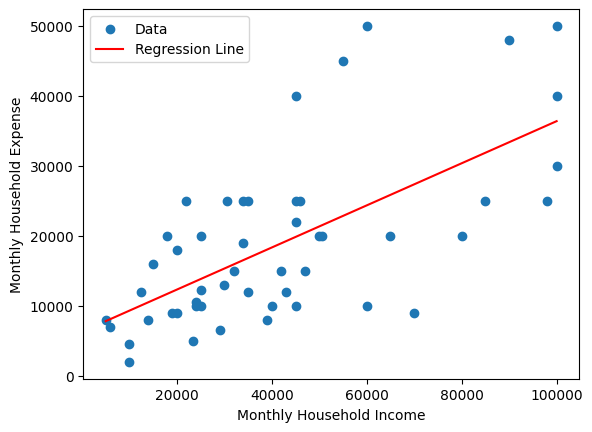

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define variables
X = df['Mthly_HH_Income']
y = df['Mthly_HH_Expense']

# Calculate coefficients
X_mean, y_mean = X.mean(), y.mean()
slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
intercept = y_mean - slope * X_mean

print("Slope:", slope)
print("Intercept:", intercept)

# Plot regression line

plt.scatter(X, y, label='Data')
plt.plot(X, slope * X + intercept, color='red', label='Regression Line')
plt.xlabel('Monthly Household Income')
plt.ylabel('Monthly Household Expense')
plt.legend()
plt.show()


In [79]:
#2
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [80]:
#a
age_survived = df[df['Survived'] == 1]['Age'].dropna()
age_not_survived = df[df['Survived'] == 0]['Age'].dropna()


mean_survived = age_survived.mean()
mean_not_survived = age_not_survived.mean()
var_survived = age_survived.var()
var_not_survived = age_not_survived.var()


n1, n2 = len(age_survived), len(age_not_survived)
pooled_std = np.sqrt(((n1 - 1) * var_survived + (n2 - 1) * var_not_survived) / (n1 + n2 - 2))
t_stat = (mean_survived - mean_not_survived) / (pooled_std * np.sqrt(1/n1 + 1/n2))

print("T-test statistic:", t_stat)


T-test statistic: -2.06668694625381


In [81]:
#b
mean_fare = df['Fare'].mean()
std_dev_fare = df['Fare'].std()
sample_size = df['Fare'].count()


z_score = 1.645
margin_of_error = z_score * (std_dev_fare / np.sqrt(sample_size))


confidence_interval = (mean_fare - margin_of_error, mean_fare + margin_of_error)
print("90% Confidence Interval for Fare:", confidence_interval)

90% Confidence Interval for Fare: (29.465624311006874, 34.942791626142395)


In [82]:
#c
correlation = df['Age'].corr(df['Fare'])
print("Correlation between Age and Fare:", correlation)

if correlation > 0.7:
    print("Strong positive correlation")
elif correlation > 0.3:
    print("Moderate positive correlation")
else:
    print("No correlation")


Correlation between Age and Fare: 0.0960666917690389
No correlation


In [83]:
#d
class_means = df.groupby('Pclass')['Fare'].mean()
overall_mean = df['Fare'].mean()

ss_between = sum(df.groupby('Pclass').size() * (class_means - overall_mean) ** 2)

df_between = len(class_means) - 1
print("Sum of Squares Between:", ss_between, "Degrees of Freedom Between:", df_between)


Sum of Squares Between: 776030.0565787118 Degrees of Freedom Between: 2


In [84]:
#e
fare_z_scores = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()


threshold = 3
outliers = df[np.abs(fare_z_scores) > threshold]
print("Outliers in Fare based on Z-score:")
print(outliers[['Fare']])


Outliers in Fare based on Z-score:
         Fare
27   263.0000
88   263.0000
118  247.5208
258  512.3292
299  247.5208
311  262.3750
341  263.0000
377  211.5000
380  227.5250
438  263.0000
527  221.7792
557  227.5250
679  512.3292
689  211.3375
700  227.5250
716  227.5250
730  211.3375
737  512.3292
742  262.3750
779  211.3375


In [85]:
#f
age_bins = [0, 18, 40, 60, np.inf]
age_labels = ['0-18', '18-40', '40-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
print("Survival Probability by Age Group:")
print(survival_by_age_group)


Survival Probability by Age Group:
AgeGroup
0-18     0.503597
18-40    0.388235
40-60    0.390625
60+      0.227273
Name: Survived, dtype: float64


<ipython-input-85-8e9b9351b5f4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
